In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')

In [4]:
median = df['ConvertedComp'].median()

In [5]:
df.dropna(axis='index', how='any', subset=['ConvertedComp', 'LanguageWorkedWith', 'Age'], inplace=True)
df['Age'] = df['Age'].astype(int)

In [6]:
dev_sal = df.groupby('Age')['ConvertedComp'].median().dropna().loc[18:60]
py_sal_y = df[df['LanguageWorkedWith'].str.contains('Python')].groupby('Age')['ConvertedComp'].median().dropna().loc[18:60].values
js_sal_y = df[df['LanguageWorkedWith'].str.contains('JavaScript')].groupby('Age')['ConvertedComp'].median().dropna().loc[18:60].values

In [7]:
ages_x = dev_sal.index
dev_y = dev_sal.values

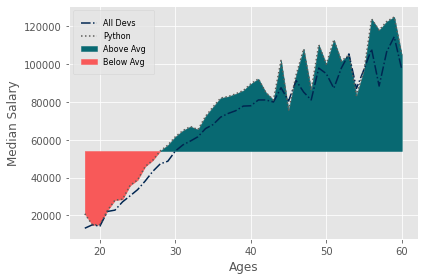

In [19]:
plt.plot(ages_x, dev_y, label='All Devs', color='#002651', linestyle='-.')
plt.plot(ages_x, py_sal_y, label='Python', color='#5d5d5a', linestyle=':')
##plt.plot(js_sal, label='JavaScript')
plt.fill_between(ages_x, py_sal_y, median, where=(py_sal_y >= median), interpolate=True, color='#086972', alpha=1, label='Above Avg')
plt.fill_between(ages_x, py_sal_y, median, where=(py_sal_y < median), interpolate=True, color='#f85959', alpha=1, label='Below Avg')
plt.xlabel('Ages')
plt.ylabel('Median Salary')
plt.legend(borderpad=1, fontsize=8)
plt.tight_layout()
plt.savefig('savefig/fil_between.svg')
plt.show()